In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("Unicorn_Companies.csv")

In [4]:
# Display all columns in outputs
pd.set_option('display.max_columns', None)

In [5]:
# View first few rows
print("First 5 rows of the dataset:")
display(df.head())


First 5 rows of the dataset:


,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


In [6]:
# reading of last 5 rows
print("Last 5 rows of the dataset:")
display(df.tail())

Last 5 rows of the dataset:


,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
1069,Zhaogang,$1B,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital"
1070,Zhuan Zhuan,$1B,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings"
1071,Zihaiguo,$1B,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital ..."
1072,Zopa,$1B,2021-10-19,Fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, North..."
1073,Zwift,$1B,2020-09-16,E-commerce & direct-to-consumer,Long Beach,United States,North America,2014,$620M,"Novator Partners, True, Causeway Media Partners"


In [7]:
# Check shape (rows, columns)
print(f"\nDataset contains {df.shape[0]} rows and {df.shape[1]} columns.")


Dataset contains 1074 rows and 10 columns.


In [8]:
# View column names
print("\nColumn Names:")
print(df.columns.tolist())


Column Names:
['Company', 'Valuation', 'Date Joined', 'Industry', 'City', 'Country', 'Continent', 'Year Founded', 'Funding', 'Select Investors']


In [9]:
#undestanding information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country           1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [10]:
# Check data types before data cleaning
print("\nData Types of Columns:")
print(df.dtypes)


Data Types of Columns:
Company             object
Valuation           object
Date Joined         object
Industry            object
City                object
Country             object
Continent           object
Year Founded         int64
Funding             object
Select Investors    object
dtype: object


In [14]:
# Converting object datatype to numeric data type

def convert_to_numeric(value):
    if isinstance(value, (int, float)) and not isinstance(value, bool):
        return float(value)
    if not isinstance(value, str):
        return np.nan
    s = value.strip().upper().replace(',', '')           # normalize
    s = s.replace('$', '')
    try:
        if 'B' in s:
            return float(s.replace('B','')) * 1e9
        if 'M' in s:
            return float(s.replace('M','')) * 1e6
        return float(s)  # if plain number string like "2500000"
    except:
        return np.nan


In [15]:
# Apply conversion
df['Valuation'] = df['Valuation'].apply(convert_to_numeric)
df['Funding'] = df['Funding'].apply(convert_to_numeric)

In [16]:
# Check data types after converting to numeric data type
print("\nData Types of Columns:")
print(df.dtypes)


Data Types of Columns:
Company              object
Valuation           float64
Date Joined          object
Industry             object
City                 object
Country              object
Continent            object
Year Founded          int64
Funding             float64
Select Investors     object
dtype: object


In [17]:
# Convert 'Date Joined' to datetime
df['Date Joined'] = pd.to_datetime(df['Date Joined'])

In [18]:
# Check data types after converting Date Joined column to datetime datatype
print("\nData Types of Columns:")
print(df.dtypes)


Data Types of Columns:
Company                     object
Valuation                  float64
Date Joined         datetime64[ns]
Industry                    object
City                        object
Country                     object
Continent                   object
Year Founded                 int64
Funding                    float64
Select Investors            object
dtype: object


In [19]:
# View first few rows
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,1.800000e+11,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8.000000e+09,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,1.000000e+11,2012-12-01,Other,Hawthorne,United States,North America,2002,7.000000e+09,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,1.000000e+11,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2.000000e+09,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,9.500000e+10,2014-01-23,Fintech,San Francisco,United States,North America,2010,2.000000e+09,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,4.600000e+10,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,4.000000e+09,"Institutional Venture Partners, Sequoia Capita..."


### Null Values Imputation

In [20]:
# Check for missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())


Missing Values per Column:
Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country              0
Continent            0
Year Founded         0
Funding             12
Select Investors     1
dtype: int64


In [21]:
# Numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumeric columns considered for outlier detection:", num_cols.tolist())


Numeric columns considered for outlier detection: ['Valuation', 'Year Founded', 'Funding']


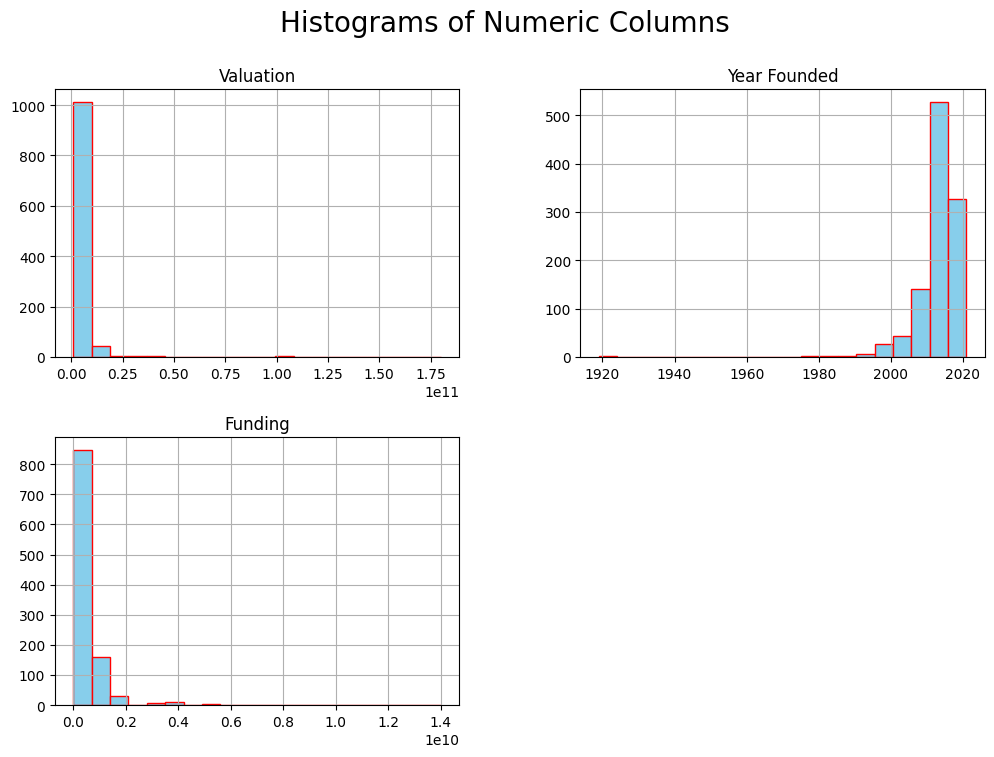

In [25]:
df[num_cols].hist(figsize=(12, 8), bins=20, color='skyblue', edgecolor='red')
plt.suptitle("Histograms of Numeric Columns", fontsize=20)
plt.show()


In [27]:
# Handle missing values
# Numeric columns → fill with median
# Categorical columns → fill with mode
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [28]:
print("\nMissing values in Each Column")
print(df.isnull().sum())


Missing values in Each Column
Company             0
Valuation           0
Date Joined         0
Industry            0
City                0
Country             0
Continent           0
Year Founded        0
Funding             0
Select Investors    0
dtype: int64


In [29]:
print("\nMissing values after imputation:")
print(df.isnull().sum().sum(), "missing values remaining.")


Missing values after imputation:
0 missing values remaining.


### Removal of Duplicates

In [30]:
before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]
print(f"\nRemoved {before - after} duplicate rows.")


Removed 0 duplicate rows.


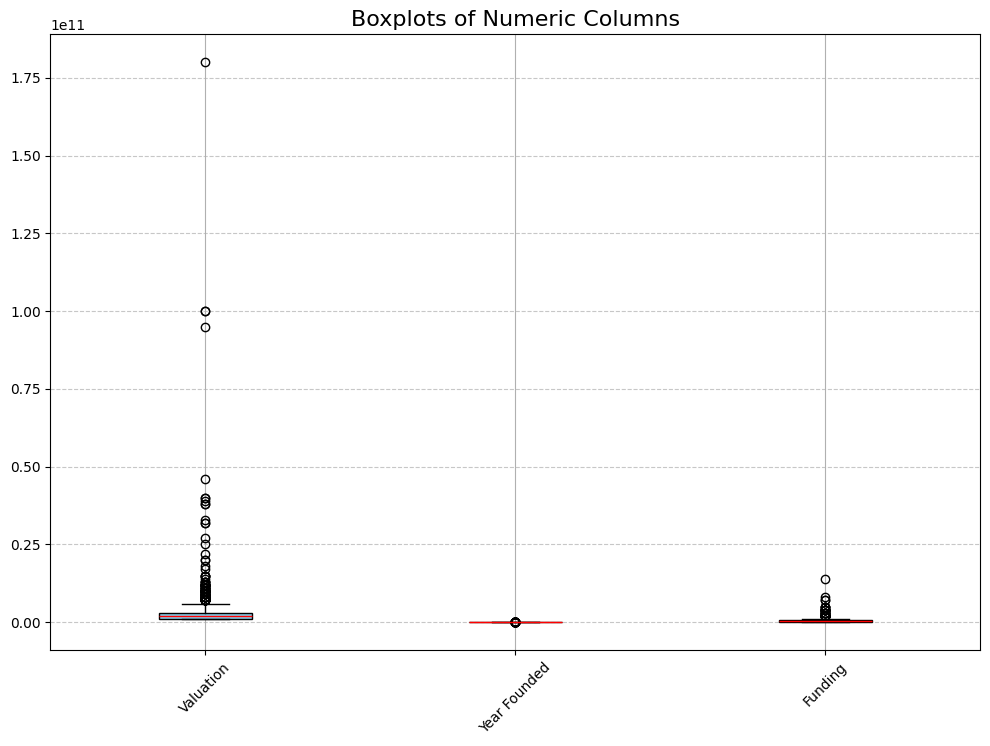

In [31]:
# Boxplot for numerical columns
# Create boxplots for all numeric columns
plt.figure(figsize=(12, 8))
df[num_cols].boxplot(patch_artist=True,
                     boxprops=dict(facecolor='skyblue', color='black'),
                     medianprops=dict(color='red'),
                     whiskerprops=dict(color='black'),
                     capprops=dict(color='black'))
plt.title("Boxplots of Numeric Columns", fontsize=16)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Check for outliers using IQR method for numeric columns

In [32]:
print("\n Numeric columns to check for outliers:",num_cols.tolist())
# Apply IQR method to cap outliers
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Replace outliers instead of removing
    df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

print("\n Outliers have been capped successfully (lower and upper limits).")


 Numeric columns to check for outliers: ['Valuation', 'Year Founded', 'Funding']

 Outliers have been capped successfully (lower and upper limits).


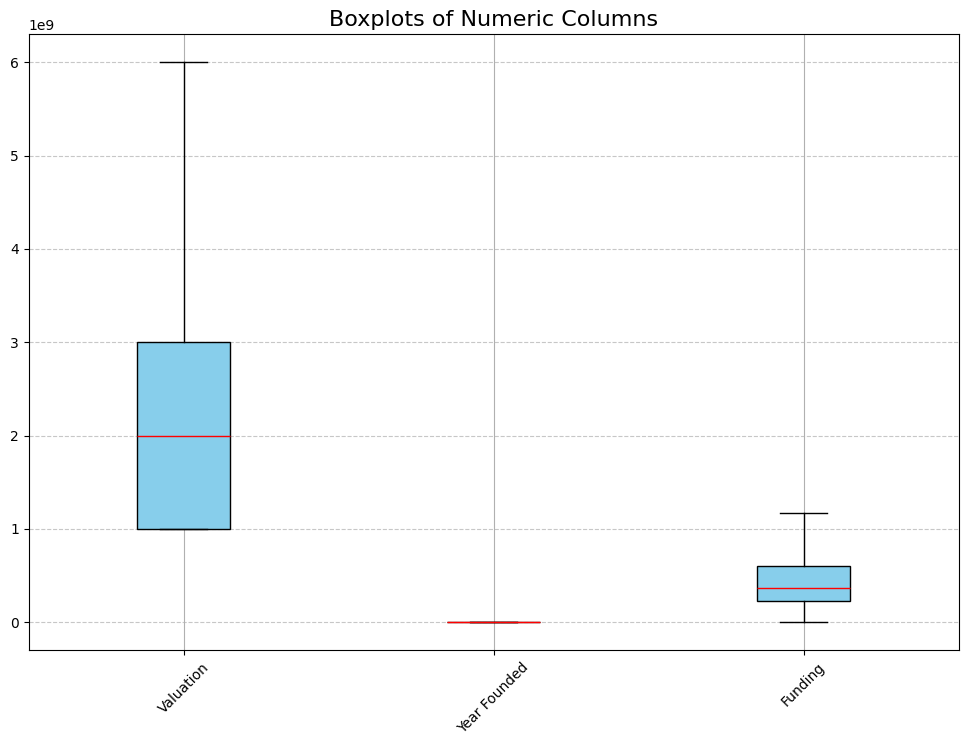

In [33]:
# Create boxplots for all numeric columns - After removing Outliers
plt.figure(figsize=(12, 8))
df[num_cols].boxplot(patch_artist=True,
                     boxprops=dict(facecolor='skyblue', color='black'),
                     medianprops=dict(color='red'),
                     whiskerprops=dict(color='black'),
                     capprops=dict(color='black'))
plt.title("Boxplots of Numeric Columns", fontsize=16)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Feature Engineering

In [34]:
# If dataset has 'Year Founded', we can create 'Age'
if 'Year Founded' in df.columns:
    df['Company Age'] = 2025 - df['Year Founded']
    print("\nFeature 'Company Age' created successfully.")

display(df.head())


Feature 'Company Age' created successfully.


,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Company Age
0,Bytedance,6.000000e+09,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012.0,1.171500e+09,"Sequoia Capital China, SIG Asia Investments, S...",13.0
1,SpaceX,6.000000e+09,2012-12-01,Other,Hawthorne,United States,North America,2003.5,1.171500e+09,"Founders Fund, Draper Fisher Jurvetson, Rothen...",21.5
2,SHEIN,6.000000e+09,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008.0,1.171500e+09,"Tiger Global Management, Sequoia Capital China...",17.0
3,Stripe,6.000000e+09,2014-01-23,Fintech,San Francisco,United States,North America,2010.0,1.171500e+09,"Khosla Ventures, LowercaseCapital, capitalG",15.0
4,Klarna,6.000000e+09,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005.0,1.171500e+09,"Institutional Venture Partners, Sequoia Capita...",20.0


In [35]:
df.dtypes

,0
Company,object
Valuation,float64
Date Joined,datetime64[ns]
Industry,object
City,object
Country,object
Continent,object
Year Founded,float64
Funding,float64
Select Investors,object


In [36]:
# Basic summary statistics
print("\nSummary Statistics:")
display(df.describe(include='all'))

# Step 10: Unique value counts for categorical columns
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"\nUnique values in '{col}': {df[col].nunique()}")



Summary Statistics:


,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Company Age
count,1074,1.074000e+03,1074,1074,1074,1074,1074,1074.000000,1.074000e+03,1074,1074.000000
unique,1073,NaN,NaN,16,256,46,6,NaN,NaN,1058,NaN
top,Bolt,NaN,NaN,Fintech,San Francisco,United States,North America,NaN,NaN,Sequoia Capital,NaN
freq,2,NaN,NaN,224,168,562,589,NaN,NaN,4,NaN
mean,NaN,2.391061e+09,2020-05-19 15:35:51.955307264,NaN,NaN,NaN,NaN,2013.231844,4.529991e+08,NaN,11.768156
min,NaN,1.000000e+09,2007-07-02 00:00:00,NaN,NaN,NaN,NaN,2003.500000,0.000000e+00,NaN,4.000000
25%,NaN,1.000000e+09,2019-05-20 06:00:00,NaN,NaN,NaN,NaN,2011.000000,2.240000e+08,NaN,9.000000
50%,NaN,2.000000e+09,2021-03-29 00:00:00,NaN,NaN,NaN,NaN,2014.000000,3.700000e+08,NaN,11.000000
75%,NaN,3.000000e+09,2021-09-19 18:00:00,NaN,NaN,NaN,NaN,2016.000000,6.030000e+08,NaN,14.000000
max,NaN,6.000000e+09,2022-04-05 00:00:00,NaN,NaN,NaN,NaN,2021.000000,1.171500e+09,NaN,21.500000



Unique values in 'Company': 1073

Unique values in 'Industry': 16

Unique values in 'City': 256

Unique values in 'Country': 46

Unique values in 'Continent': 6

Unique values in 'Select Investors': 1058


### Visualization

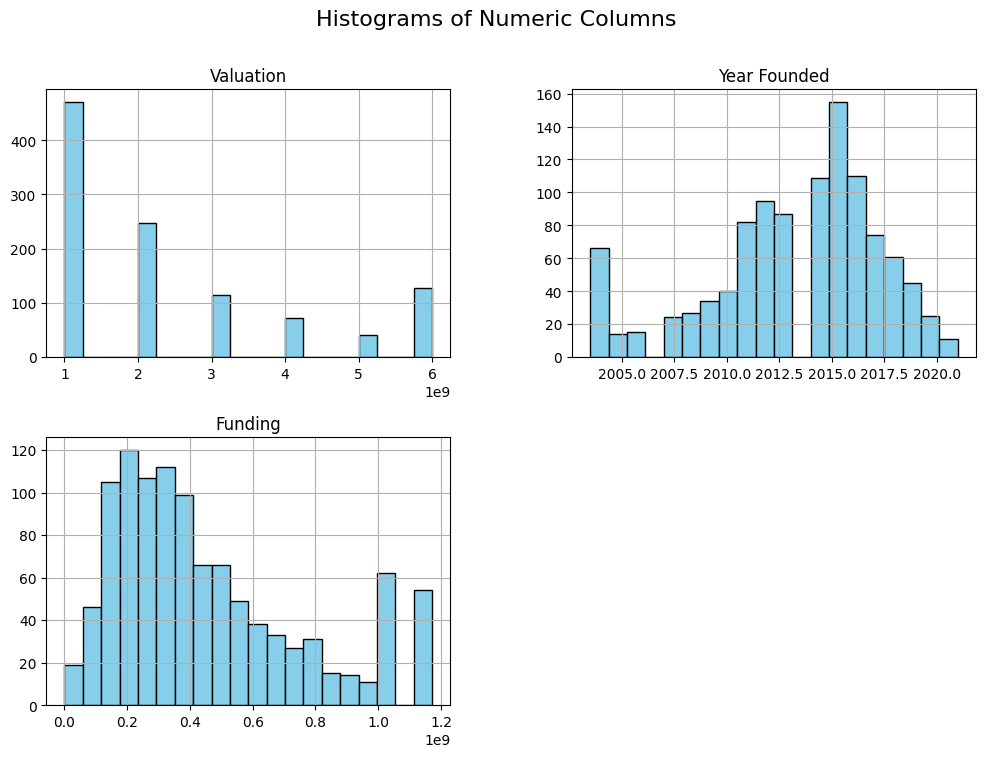

In [37]:
# Histogram for numerical columns
df[num_cols].hist(figsize=(12, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numeric Columns", fontsize=16)
plt.show()

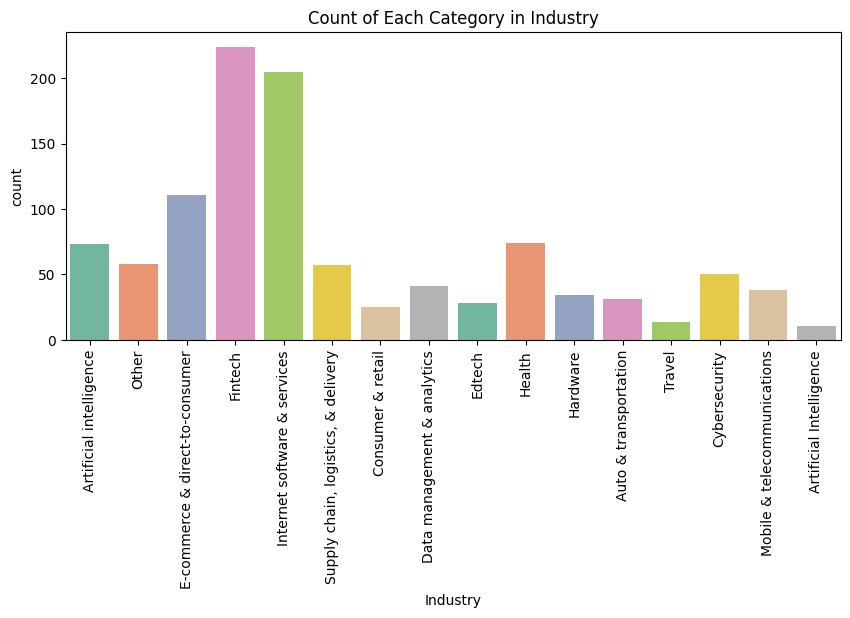

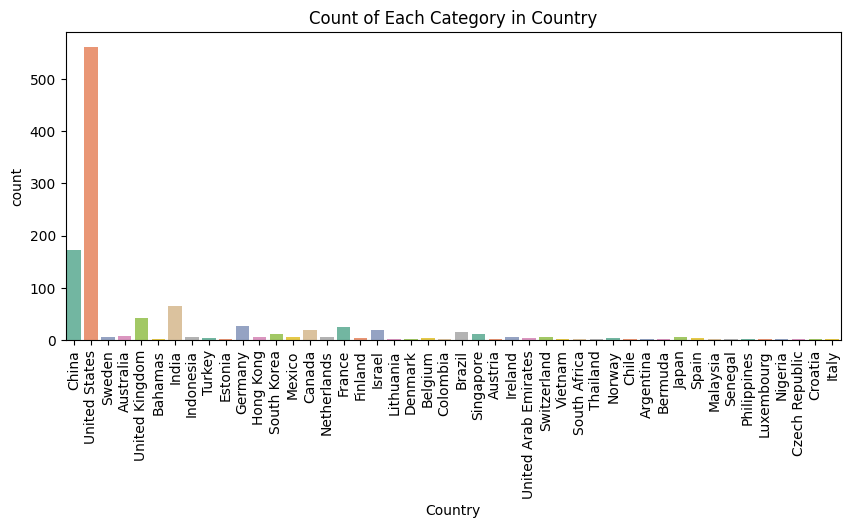

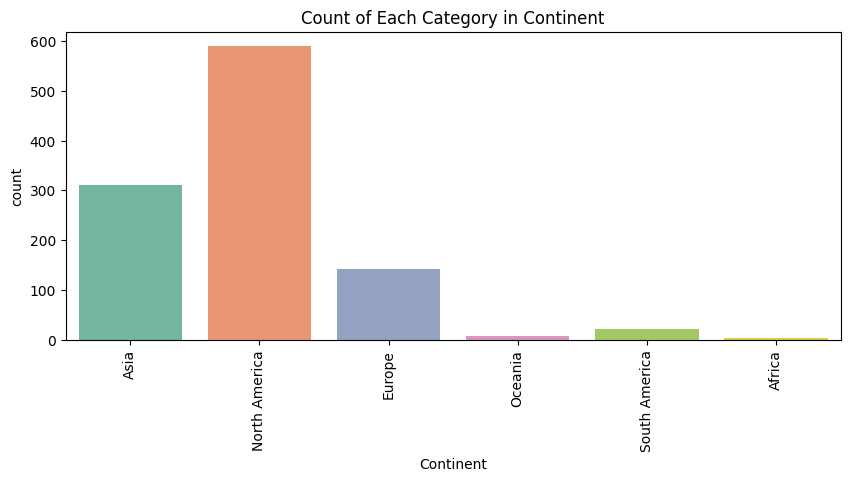

In [38]:
# Countplot for categorical columns - Industry, Country and Continent
cat_cols_selected = ['Industry', 'Country', 'Continent']
for col in cat_cols_selected:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f"Count of Each Category in {col}")
    plt.xticks(rotation=90)
    plt.show()


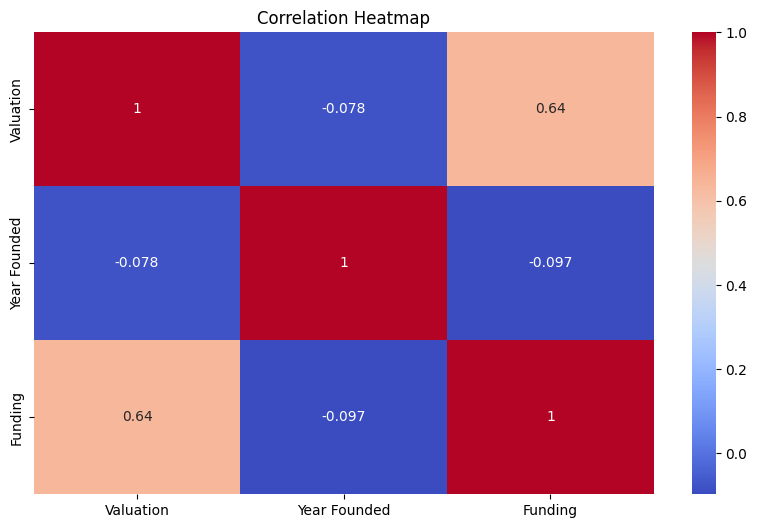

In [39]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [40]:
df.columns

Index(['Company', 'Valuation', 'Date Joined', 'Industry', 'City', 'Country',
       'Continent', 'Year Founded', 'Funding', 'Select Investors',
       'Company Age'],
      dtype='object')

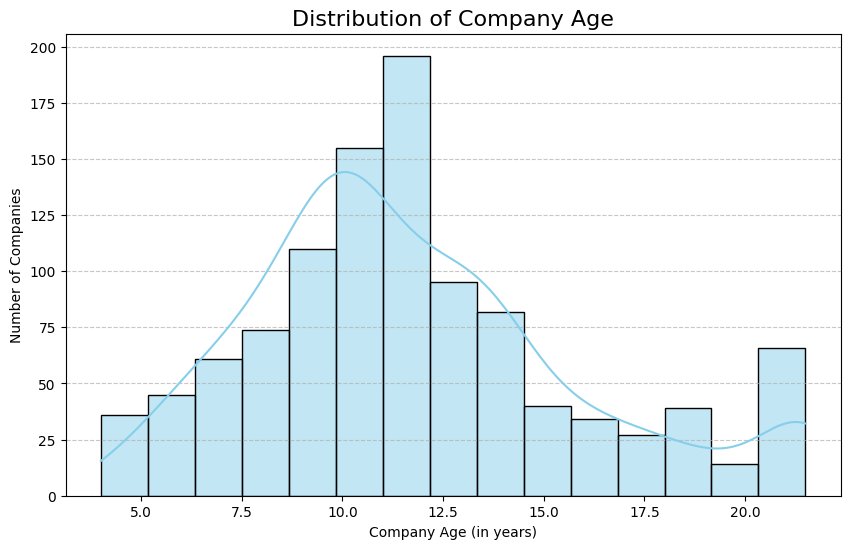

In [41]:
#Histogram for Company Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Company Age'], bins=15, kde=True, color='skyblue', edgecolor='black')
plt.title("Distribution of Company Age", fontsize=16)
plt.xlabel("Company Age (in years)")
plt.ylabel("Number of Companies")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [42]:
# Filtering

# Filter by country
if 'Country' in df.columns:
    country = 'United States'  # Change value to test
    print(f"\nCompanies from {country}:")
    display(df[df['Country'] == country].head())


Companies from United States:


,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Company Age
1,SpaceX,6.000000e+09,2012-12-01,Other,Hawthorne,United States,North America,2003.5,1.171500e+09,"Founders Fund, Draper Fisher Jurvetson, Rothen...",21.5
3,Stripe,6.000000e+09,2014-01-23,Fintech,San Francisco,United States,North America,2010.0,1.171500e+09,"Khosla Ventures, LowercaseCapital, capitalG",15.0
7,Instacart,6.000000e+09,2014-12-30,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012.0,1.171500e+09,"Khosla Ventures, Kleiner Perkins Caufield & By...",13.0
8,JUUL Labs,6.000000e+09,2017-12-20,Consumer & retail,San Francisco,United States,North America,2015.0,1.171500e+09,Tiger Global Management,10.0
9,Databricks,6.000000e+09,2019-02-05,Data management & analytics,San Francisco,United States,North America,2013.0,1.171500e+09,"Andreessen Horowitz, New Enterprise Associates...",12.0


In [43]:
# Filter companies founded after 2015
if 'Year Founded' in df.columns:
    print("\nCompanies founded after 2015:")
    display(df[df['Year Founded'] > 2015].head())



Companies founded after 2015:


,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Company Age
12,FTX,6.000000e+09,2021-07-20,Fintech,San Francisco,Bahamas,North America,2018.0,1.171500e+09,"Sequoia Capital, Thoma Bravo, Softbank",7.0
20,Rapyd,6.000000e+09,2019-12-03,Fintech,London,United Kingdom,Europe,2016.0,7.700000e+08,"Target Global, General Catalyst, Durable Capit...",9.0
22,Genki Forest,6.000000e+09,2020-03-01,Consumer & retail,Beijing,China,Asia,2016.0,7.210000e+08,"Sequoia Capital China, Longfor Capitalm, Gaoro...",9.0
26,Devoted Health,6.000000e+09,2018-10-16,Health,Waltham,United States,North America,2017.0,1.171500e+09,"Andreessen Horowitz, F-Prime Capital, Venrock",8.0
27,OpenSea,6.000000e+09,2021-07-20,E-commerce & direct-to-consumer,New York,United States,North America,2017.0,4.270000e+08,"Andreessen Horowitz, Thirty Five Ventures, Sou...",8.0


In [44]:
# Filter by industry
if 'Industry' in df.columns:
    industry = 'Fintech'  # Change value to test
    print(f"\nCompanies in {industry} Industry:")
    display(df[df['Industry'] == industry].head())


Companies in Fintech Industry:


,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Company Age
3,Stripe,6.000000e+09,2014-01-23,Fintech,San Francisco,United States,North America,2010.0,1.171500e+09,"Khosla Ventures, LowercaseCapital, capitalG",15.0
4,Klarna,6.000000e+09,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005.0,1.171500e+09,"Institutional Venture Partners, Sequoia Capita...",20.0
6,Checkout.com,6.000000e+09,2019-05-02,Fintech,London,United Kingdom,Europe,2012.0,1.171500e+09,"Tiger Global Management, Insight Partners, DST...",13.0
10,Revolut,6.000000e+09,2018-04-26,Fintech,London,United Kingdom,Europe,2015.0,1.171500e+09,"index Ventures, DST Global, Ribbit Capital",10.0
12,FTX,6.000000e+09,2021-07-20,Fintech,San Francisco,Bahamas,North America,2018.0,1.171500e+09,"Sequoia Capital, Thoma Bravo, Softbank",7.0
